In [1]:
import os
import numpy as np
import sep
import seaborn 
import pandas as pd
from astropy.io import fits
from astropy.io import ascii
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline

In [3]:
data_path = os.path.abspath('/home/bos0109/sersic/work/rhino/data/extract_test/')

### Load Macri master frame cat


This is the catalog of sources detected in the deepest coadd of CSTAR, from 2010 observations.

In [4]:
master_cat = ascii.read(
    './../../../data/extract_test/master2010_masked_wcs.fitssources_detected_master2010_masked_wcs.csv', 
               format='csv')

In [156]:
master_l = os.path.join(data_path, 'master2010_masked.fits')

In [148]:
import aplpy

INFO:astropy:Auto-setting vmin to  3.499e+02
INFO:astropy:Auto-setting vmax to  2.090e+03


INFO: Auto-setting vmin to  3.499e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.090e+03 [aplpy.core]


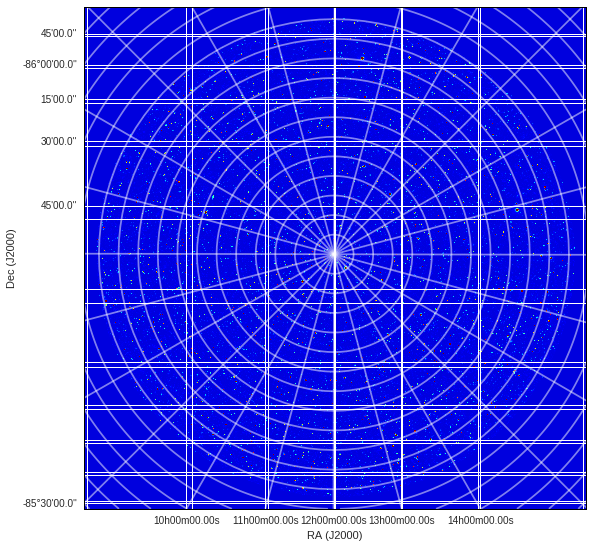

In [225]:
gf = aplpy.FITSFigure('./../../../data/extract_test/stellar/CSTAR/images/master2010_masked.fits')
gf.show_colorscale()
gf.add_grid()

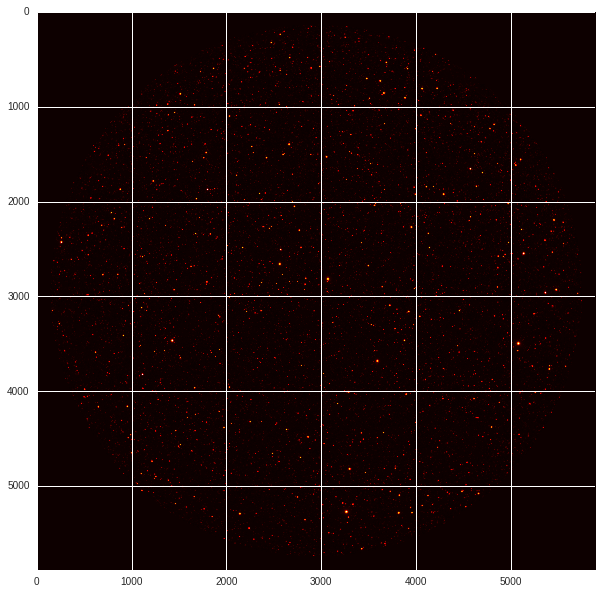

In [142]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(ml), cmap=cm.hot)

## Put WCS on each star in this cat

In [84]:
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import astropy.units as u

In [159]:
masterwcs = WCS(fits.getheader('./../../../data/extract_test/stellar/CSTAR/images/master2010_masked.fits'))

In [160]:
newcoords = masterwcs.all_pix2world(master_cat['x'],master_cat['y'], 0)

In [257]:
master_cat.remove_columns(['ra', 'dec'])

In [228]:
ra, dec = newcoords

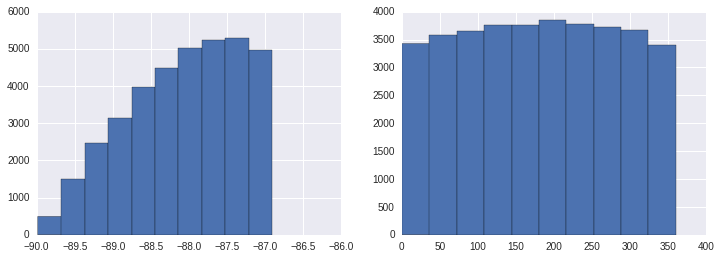

In [244]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.hist(dec)
plt.xlim(-90,-86)
plt.subplot(122)
plt.hist(ra)
plt.show()

In [258]:
master_cat

index,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
int64,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
0,8.36850070953,70,64,2982,2992,142,150,2987.00242005,145.34873823,5.91264018082,3.87419449093,-0.535922000771,2.45864796638,1.93439519405,-0.242042586207,0.171276703477,0.261395633221,0.0473858267069,976.518310547,1015.49633789,22.0905418396,24.099822998,2988,145,2988,145,0
1,8.36850070953,178,172,2952,2968,142,153,2960.00210806,146.998191825,11.3974280584,6.84612140155,-0.640612289886,3.38908219337,2.59955215454,-0.137202784419,0.0882029905915,0.146840408444,0.0165068414062,7529.1953125,7656.30322266,113.586128235,118.106384277,2960,147,2960,147,0
2,8.36850070953,91,75,3126,3142,147,153,3133.41038821,149.18562417,10.4341210968,1.94776010456,0.545630086586,3.23559236526,1.38304829597,0.0639440342784,0.0972642228007,0.521042943001,-0.0544936582446,3207.17700195,3262.27954102,105.691192627,149.629150391,3133,149,3134,148,0
3,8.36850070953,105,102,3041,3051,143,154,3046.08568659,148.21935452,6.56544561823,7.96884954136,-0.555102655533,2.8568983078,2.5243666172,-1.23615705967,0.15321496129,0.126232087612,0.0213456247002,1651.11523438,1715.77905273,24.9261054993,28.1149902344,3046,150,3046,143,0
4,8.36850070953,29,29,2639,2646,157,161,2642.44676075,159.1262112,3.30259911367,1.41280751417,-0.608005938326,1.86582779884,1.11089754105,-0.285883188248,0.328845471144,0.768713891506,0.283039271832,342.371734619,376.003234863,16.1449756622,17.4417114258,2642,159,2643,158,0
5,8.36850070953,75,71,2843,2855,148,155,2849.48533135,151.560004618,8.11906640256,3.88693688575,-1.43948649447,2.92613554001,1.85573005676,-0.298679202795,0.13182233274,0.27535161376,0.0976380556822,835.644714355,853.206359863,15.1365642548,16.1636962891,2850,152,2849,151,1
6,8.36850070953,206,196,2824,2844,149,162,2832.88963006,155.599429564,13.644092524,8.58139248468,0.358597063706,3.69721055031,2.92508435249,0.0703629925847,0.0733723789454,0.116659328341,-0.00613213283941,5329.12207031,5370.13476562,67.214263916,69.8581237793,2833,156,2833,156,1
7,8.36850070953,101,99,2658,2669,155,165,2663.63447846,160.040347028,7.3206558952,5.00706547379,-0.141949850226,2.70727396011,2.23570775986,-0.0610495880246,0.136674910784,0.199827626348,0.00774944294244,2208.59326172,2263.84179688,40.9314460754,43.1430664062,2664,160,2664,160,0
8,8.36850070953,53,49,3005,3013,160,166,3008.9760511,162.873324315,4.92336762769,2.80813995066,0.479701254928,2.24211335182,1.64451682568,0.212909132242,0.206550866365,0.362135022879,-0.0705682113767,641.289978027,662.705749512,16.5070476532,17.9379577637,3009,163,3009,163,0


In [259]:
master_cat.add_column(Table.Column(ra, name='ra'))
master_cat.add_column(Table.Column(dec, name='dec'))
master_cat.write('./../../../data/extract_test/master2010_masked_wcs.fitssources_detected_master2010_masked_wcs.csv', 
               format='csv')

## Bring the variables cat

In [75]:
ryancat = os.path.abspath('./../../../data/extract_test/stellar/CSTAR/cats/stars.dat')
varcat = os.path.abspath('./../../../data/extract_test/stellar/CSTAR/cats/variables.csv')

In [93]:
nwnames = ['ID2010','ID2','ID3','RAh','RAm','RAs','Decd','Decm','Decs','imag','deltai','J','p', 'source', 
           'T0', 'Class', 'Note']

variables = ascii.read(varcat, format='csv', names=nwnames)

In [81]:
variables

ID2010,ID2,ID3,RAh,RAm,RAs,Decd,Decm,Decs,imag,deltai,J,p,source,T0,Class,Note
str7,float64,str10,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,str3,float64,str2,str2
n012506,-9.0,S3Y9000067,11,44,32.67,-87,27,35.9,10.89,0.12,2.07,31.447988,LS,-9.0,MP,-9
n015318,3125.0,S3YM000469,10,43,46.63,-87,25,10.1,9.69,0.09,3.32,3.602742,LS,-9.0,MP,-9
n015705,-9.0,S3YM000358,10,4,32.92,-87,13,44.7,10.97,0.08,0.65,19.081678,LS,-9.0,MP,-9
n016257,3697.0,S742000061,12,8,11.93,-87,35,39.9,11.56,0.08,0.75,26.5679,LS,-9.0,MP,-9
n016505,3850.0,S742000043,12,34,25.12,-87,34,37.7,10.14,0.06,1.59,17.251594,LS,-9.0,MP,A
n017573,4463.0,S3YM000518,10,40,16.05,-87,29,29.8,11.16,0.06,0.58,0.869262,LS,785.7941,ED,-9
n017781,-9.0,S74D000351,13,21,24.66,-87,29,48.4,12.41,0.1,0.25,4.822329,LS,-9.0,MP,-9
n020508,-9.0,S74D000440,13,1,58.4,-87,39,56.3,9.01,0.16,3.11,5.79838,LS,786.5008,ED,-9
n023757,-9.0,S3YM000018,9,51,32.15,-87,28,32.7,13.24,0.18,0.2,0.2409,LS,785.414,PR,-9


In [102]:
varcoord = []
varcoordra = []
varcoorddec= []
for avar in variables:
    ra = (avar['RAh']+ avar['RAm']/60. + avar['RAs']/3600.)*15.*u.degree
    dec = (avar['Decd'] - avar['Decm']/60. - avar['Decs']/3600.)*u.degree

    varcoord.append(SkyCoord(ra = ra, dec = dec,frame='icrs', equinox='J2000'))
    
    varcoordra.append(varcoord[-1].ra.deg)
    varcoorddec.append(varcoord[-1].dec.deg)

### Try now to match both catalogues produced

If these two catalogs are matched succesfully I can try to extract reals from variable stars

In [92]:
import astroML.crossmatch as cx

In [ ]:
Stars = np.array([ra, dec]).T ##master
Vars = np.array([varcoordra, varcoorddec]).T

In [175]:
distr, indr  = cx.crossmatch_angular(Stars, Vars, max_distance=45./3600.)
matchsr = ~np.isinf(distr)

In [219]:
distl, indl  = cx.crossmatch_angular(Vars, Stars, max_distance=45./3600.)
matchsl = ~np.isinf(distl)

In [221]:
objID = np.zeros_like(Vars[:,0]) -1
CSTARID = np.zeros_like(Vars[:,0]) -1
for i in range(len(Vars)):
    if distl[i] != np.inf: 
        dist_o = distl[i]
        ind_o  = indl[i]
        # now ind is a star number
        # lets see if that star has matched the same obj
        if distr[ind_o] != np.inf:
            dist_s = distr[ind_o]
            ind_s = indr[ind_o]
            if ind_s == i:
                objID[i] = ind_o  
                CSTARID[i] = master_cat['index'][ind_o]

In [222]:
sum(objID > 0)

183

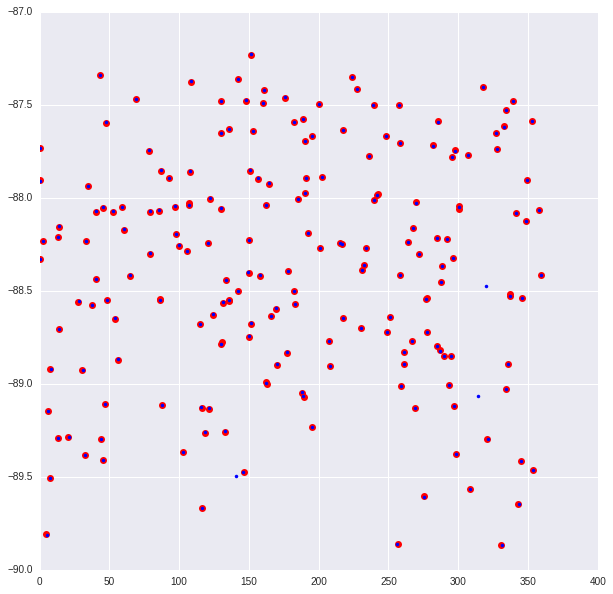

In [223]:
plt.figure(figsize=(10,10))
plt.plot(ra[matchsr], dec[matchsr], 'or')
plt.plot(varcoordra, varcoorddec, '.b')

## Success matching variables with master shows that I can build lightcurves.

In [252]:
variables['index_master'] = CSTARID
variables['RA'] = varcoordra
variables['Dec'] = varcoorddec

In [253]:
variables

ID2010,ID2,ID3,RAh,RAm,RAs,Decd,Decm,Decs,imag,deltai,J,p,source,T0,Class,Note,index_master,RA,Dec
str7,float64,str10,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,str3,float64,str2,str2,float64,float64,float64
n012506,-9.0,S3Y9000067,11,44,32.67,-87,27,35.9,10.89,0.12,2.07,31.447988,LS,-9.0,MP,-9,1441.0,176.136125,-87.4599722222
n015318,3125.0,S3YM000469,10,43,46.63,-87,25,10.1,9.69,0.09,3.32,3.602742,LS,-9.0,MP,-9,1821.0,160.944291667,-87.4194722222
n015705,-9.0,S3YM000358,10,4,32.92,-87,13,44.7,10.97,0.08,0.65,19.081678,LS,-9.0,MP,-9,1907.0,151.137166667,-87.2290833333
n016257,3697.0,S742000061,12,8,11.93,-87,35,39.9,11.56,0.08,0.75,26.5679,LS,-9.0,MP,-9,2011.0,182.049708333,-87.5944166667
n016505,3850.0,S742000043,12,34,25.12,-87,34,37.7,10.14,0.06,1.59,17.251594,LS,-9.0,MP,A,2022.0,188.604666667,-87.5771388889
n017573,4463.0,S3YM000518,10,40,16.05,-87,29,29.8,11.16,0.06,0.58,0.869262,LS,785.7941,ED,-9,2134.0,160.066875,-87.4916111111
n017781,-9.0,S74D000351,13,21,24.66,-87,29,48.4,12.41,0.1,0.25,4.822329,LS,-9.0,MP,-9,2260.0,200.35275,-87.4967777778
n020508,-9.0,S74D000440,13,1,58.4,-87,39,56.3,9.01,0.16,3.11,5.79838,LS,786.5008,ED,-9,2747.0,195.493333333,-87.6656388889
n023757,-9.0,S3YM000018,9,51,32.15,-87,28,32.7,13.24,0.18,0.2,0.2409,LS,785.414,PR,-9,3254.0,147.883958333,-87.47575


In [254]:
variables.write('/home/bos0109/sersic/work/rhino/data/extract_test/stellar/CSTAR/cats/matched_variables.csv',
                format='csv')